## Problem 1

**For each question, write a paragraph to explain your answer.**

### Question 1.1 [5 points]
Can you explain the difference between normal gradient descent, also known as batch gradient descent, and stochastic gradient descent?

Stochastic gradient descent is an approximation of normal gradient descent. Normal gradient descent is slower than stochastic gradient descent, because for each step the gradient of every sample is calculated and used to update. In stochastic gradient descent, a random mini batch is chosen to calculate the gradient for each update, making it much faster and computationally efficient. The gradients are computed by the same methods, stochastic gradient descent just randomly chooses which sample's gradient to compute and use to update, making it an approximation of the true gradient. Though stochastic gradient descent is noiser than normal gradient descent because it does not precisely calculate the gradient of every sample, it can out perform normal gradient descent because more iterations can be run to converge on the minimum of the optimization function and it is less likely to get trapped in bad local minima. 

### Question 1.2 [5 points]
What is momentum in the context of stochastic gradient descent, and how does it improve optimization?

Momentum Gradient Descent attempts to accelerate convergence of gradient descent algorithms. The momentum of the function is the exponential moving average of past gradients. This term is added to the gradient of the current step, adding a memory of past gradients to the descent trajectory. This speeds up the algorithm because it minimizes zig zagging, oscillatory behavior of the descent, making it faster to find minima. 

### Question 1.3 [5 points]
What is the Adam optimizer, and how does it differ from other optimization algorithms like stochastic gradient descent and momentum-based methods?

The Adam Optimizer is the Adaptive Movement Estimation algorithm, which is an optimization algorithm that improves upon gradient descent. Unlike stochastic gradient descent which uses a single learning rate, Adam Optimization computes individual adaptive learning rates for different parameters. These learning rates are adapted from the first and second moments of gradients. Adam Optimization is stimilar to RMSProp and AdaGrad, but outperforms these methods because it updates the learning rate by using exponential moving averages of the gradient itself and the squared gratient. Other momentum-based methods just update using the average of recent gradients, rather than also the squared gradient. These moving averages are controlled by hyperparameters beta1, beta2, and epsilon.

### Question 1.4 [5 points]
What is the ReLU activation function, and why is it commonly used in deep learning? What are some potential drawbacks of using ReLU?

ReLU stands for rectified linear unit. This activation function makes any negative outputs from hudden notes zero. ReLU activation is = 0 for all negative values of z and linearly related to z (z=z) for nonnegative values of z. It is commonly used in deep learning because it speeds up deep learning algorithms. The gradient of the ReLU activation function = 1 when z > 0, which prevents the gradient vanishing problem even after repeated multiplications during training. Unlike sigmoid activation functions, ReLU activation promotes better flows of gradients during backpropogation and treats large values of z approriately, rather than scaling these values to below 1. 

### Question 1.5 [5 points]
What is batch normalization, and how does it improve the training of deep neural networks? Can you explain how batch normalization works and what benefits it provides?

Batch normalization attempts to reduce internal covariate shifts during training. Internal covariate shifts are changes in activations as a result of changing network parameters during learning. In batch normalization, the distribution of layer inputs is normalized. Training data is split into mini batches. For each feature in one mini batch, inputs to each layer are normalized to have zero mean and variance = 1 and then scaled and shifted by γ and β. Instead of receiving input x, layers will received transformed input BN(x). Batch normalization speeds up training of deep neural networks and improves generalization by normalizing the model. Batch normalization prevents backpropogation from being affected by the scale of parameters and prevents the model from getting stuck in local minima by preventing activations from being affected by small changes in parameter values. 

### Question 1.6 [5 points]
What is weight decay, and how does it regularize the training of deep neural networks? Can you explain how weight decay works and what benefits it provides?

Weight decay is a regularization method that seeks to reduce overfitting. Weight decay adds a penalty to the error function. The derivative of the penalty is then added to the gradient expessions. Large values of the penalty will reduce weights to zero. The runing parameter for the penalty value is usually estimated via cross validation. Weight decay regulatizes the training of deep neural networks by reducing the number of weights contributing to finding the global minimum of the cost function. By penalizing the cost function, weight decay prevents overfitting to training data and improves generalizability of models by reducing model complexity caused by an excess of training weights.

### Question 1.7 [5 points]
What is dropout, and how does it regularize the training of deep neural networks? Can you explain how dropout works and what benefits it provides?

Dropout is a regularization method designed to reduce model overfitting by randomly dropping inputs and hidden nodes during training. The theory behind dropout is that relevant features will be robust to different combinations and perturbations, but nonrelevant features taht contribute to overfitting will not be robust to changing combinations of features during training. Dropout works by randomly selecting a fraction of inputs and hidden nodes to be dropped during every iteration. This results in a small subnetwork of weights and biases that are then used to compute activation values and backpropogation. These updated values are then added to the full network for the next iteration. Dropout benefits deep neural networks because it  improves generalization of network models and is computationally inexpensive.

## Problem 2

Run the following code to setup the package and the dataframe.

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

Run the following code to read the stock prices of Coca-Cola for the past 3 months.

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the stock symbol and start and end dates for the data
symbol = 'KO'
end = datetime.now()
start = end - timedelta(days=90)

# Load the data from yfinance
df = yf.download(symbol, start=start, end=end)

# Print the first 5 rows of the data
print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-11-23  62.490002  62.790001  62.299999  62.630001  62.188946   8990400
2022-11-25  62.730000  62.810001  62.380001  62.689999  62.248520   5165500
2022-11-28  62.689999  63.099998  62.560001  62.700001  62.258453  12267500
2022-11-29  62.520000  62.570000  61.980000  62.480000  62.040001  10969600
2022-11-30  62.009998  63.680000  61.750000  63.610001  63.610001  30433900


### Question 2.1 [10 points]
Implement a function to calculate the exponential moving average (EMA) of the KO's daily close prices. Let the initial EMA value be 60 and the momentum factor to be 0.5. Plot the daily close price and the EMA of it as two lines with different colors.

In [ ]:
def EMA(df,ema_init,beta):
  ema = [ema_init]
  for price in df['Close']:
    ema.append((ema[-1]*(beta))+(price*(1-beta)))
  return ema

In [ ]:
ema_init=60
beta=0.5
ema_ko_60=EMA(df,ema_init,beta)

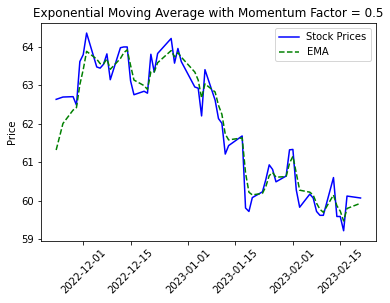

In [ ]:
#plotting question 2.1
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


fig, axes = plt.subplots(1, 1)
axes.plot(df.index,df['Close'],label='Stock Prices',color='blue')
axes.plot(df.index,ema_ko_60[1:],label='EMA',linestyle='dashed',color='green')
axes.set_xticklabels(df.index)
fmt = mdates.DateFormatter('%Y-%m-%d')
axes.xaxis.set_major_formatter(fmt)
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.legend()
plt.title('Exponential Moving Average with Momentum Factor = 0.5')
plt.show()

### Question 2.2 [5 points]
Compare different values of the momentum factor (also known as the smoothing factor) in 0.5, 0.7, 0.9, and 0.95, and analyze how the momentum factor affects the exponential moving average (EMA) of the close price of KO. Plot the EMAs as lines with different colors.

In [ ]:
ema_init=60
momentums = [0.5,0.7,0.9,0.95]
ema_dict={}
for x in momentums:
  ema_dict[x]=EMA(df,ema_init,x)

Higher values of momentum worsen the approximation of the Exponential Moving Average


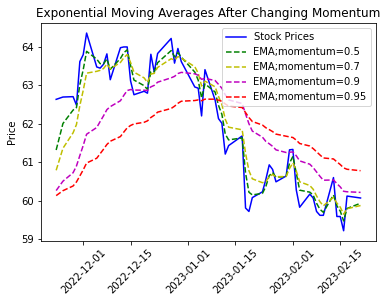

In [ ]:
#plotting question 2.2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

print('Higher values of momentum worsen the approximation of the Exponential Moving Average')

fig, axes = plt.subplots(1, 1)
axes.plot(df.index,df['Close'],label='Stock Prices',color='blue')
axes.plot(df.index,ema_dict[0.5][1:],label='EMA;momentum=0.5',linestyle='dashed',color='green')
axes.plot(df.index,ema_dict[0.7][1:],label='EMA;momentum=0.7',linestyle='dashed',color='y')
axes.plot(df.index,ema_dict[0.9][1:],label='EMA;momentum=0.9',linestyle='dashed',color='m')
axes.plot(df.index,ema_dict[0.95][1:],label='EMA;momentum=0.95',linestyle='dashed',color='r')
axes.set_xticklabels(df.index)
fmt = mdates.DateFormatter('%Y-%m-%d')
axes.xaxis.set_major_formatter(fmt)
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.legend()
plt.title('Exponential Moving Averages After Changing Momentum')
plt.show()

## Problem 3

### Question 3.1 [5 points]
Read doc about the [CIFAR10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html) data. Create train and test datasets. Split the train set 50-50 into train and validation sets. Use the following transformation method when creating the datasets:
```python
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
```
Set the batch size to 64 and create dataloaders for train, validation and test sets. Get one batch of train samples and visualize them in a 8x8 grid. Hint: to visualize the samples as color images, you need to unnormalize them by following this formula: $unnormalized\_sample = normalized\_sample \times std + mean$. PyTorch data are channel-first format while the `imshow` function assumes a color image to be channel-last. You need to permuate the dimensions.

In [ ]:
import torch
import torchvision          
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

VAL_SIZE = 0.5
BATCH_SIZE = 64

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_indices, val_indices, _, _ = train_test_split(
    range(len(trainset)),
    trainset.targets,
    stratify=trainset.targets,
    test_size=VAL_SIZE,
) 


train_split = Subset(trainset, train_indices)
val_split = Subset(trainset, val_indices)

# create data loaders
train_batches = DataLoader(train_split, batch_size=BATCH_SIZE, shuffle=True)
val_batches = DataLoader(val_split, batch_size=BATCH_SIZE, shuffle=False)
test_batches = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Get one batch of train samples and visualize them in a 8x8 grid. Hint: to visualize the samples as color images, you need to unnormalize them by following this formula:  𝑢𝑛𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒𝑑_𝑠𝑎𝑚𝑝𝑙𝑒=𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒𝑑_𝑠𝑎𝑚𝑝𝑙𝑒×𝑠𝑡𝑑+𝑚𝑒𝑎𝑛 . PyTorch data are channel-first format while the imshow function assumes a color image to be channel-last. You need to permuate the dimensions.

In [ ]:
#getting one batch of train samples
dataiter = iter(train_batches)
images, labels = next(dataiter)

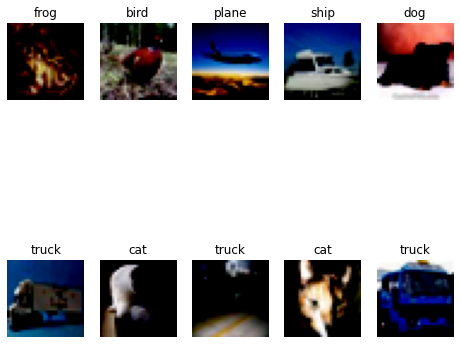

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels_map = {
    0: "plane",
    1: "car",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 2 #one image from every class
for i in range(1, cols * rows + 1):
  img = images[i]
  label = labels[i]
  img = img*torch.std(img)+torch.mean(img) # unnormalize  
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[int(label.numpy())])
  plt.axis("off")
  #plt.imshow(img.permute(1,2,0)) #can use either
  plt.imshow(torchvision.utils.make_grid(img.permute(1,2,0))) #
plt.show()

### Question 3.2 [3 points]
Inspect the train sample batch by printing its shape and basic statistics.

In [ ]:
train_features, train_labels = next(iter(train_batches))

In [ ]:
train_features.shape

torch.Size([64, 3, 32, 32])

In [ ]:
print(type(train_features))

<class 'torch.Tensor'>


In [ ]:
# print basic statistics of training features
print(torch.min(train_features))
print(torch.max(train_features))
print(torch.mean(train_features))
print(torch.median(train_features))
print(torch.std(train_features))
print(torch.var(train_features))
print(torch.sum(train_features))

tensor(-1.)
tensor(1.)
tensor(-0.0882)
tensor(-0.1216)
tensor(0.4846)
tensor(0.2348)
tensor(-17332.6543)


In [ ]:
#print info for trainning labels
print(train_labels.shape) 
print(train_labels.unique())

torch.Size([64])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


### Question 3.3 [15 points]
Train a multi-layer perceptron (MLP) to classify the CIFAR10 data. Use two hidden layers each with 64 neurons, ReLU activation, [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html), [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) with learning rate=0.001 and momentum=0.9. Train your model for 20 epoches. Remember to save the best model based on validation accuracy at the end of each epoch. Book-keep train/validation loss/accuracy for all epoches. After training, evaluate the saved best model on the test set. Plot the train/validation loss/accuracy against epoch number. This is your baseline model. Hint: to use a GPU for training, change the runtime accelerator to GPU. Use the following code to set the device to cuda:
```python
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
```
You can use this [notebook](https://colab.research.google.com/drive/175ILzaqJcL_DTE9wL8DQlkuCZ1lu-VP_?usp=share_link) as a template.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.ReLU(),
      nn.Linear(64, 64),
      nn.ReLU(),
      nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.layers(x)

In [ ]:
# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
model

MLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
def model_eval(model, loader_, criterion):
    # Test the model
    model.eval()
    eval_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loader_:
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            eval_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    eval_loss /= len(loader_)
    eval_acc = correct/len(loader_.dataset)
    return eval_loss, eval_acc

In [ ]:
# Train the model
base_model_dict={} #format is training loss, training acc, validation loss, validation acc
model = model.to(device)
best_acc = 0
for epoch in range(20):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_batches):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_batches)
    train_acc = correct/len(train_batches.dataset)
    val_loss, val_acc = model_eval(model, val_batches, criterion)
    base_model_dict[epoch]=train_loss,train_acc,val_loss,val_acc
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        torch.save(model.state_dict(), 'mlp_best_model.pt')

Train Epoch: 0	Loss: 2.183218	Acc: 0.212	Val - Loss:2.044627	Acc:0.267
Train Epoch: 1	Loss: 1.954400	Acc: 0.305	Val - Loss:1.886735	Acc:0.335
Train Epoch: 2	Loss: 1.828556	Acc: 0.352	Val - Loss:1.796646	Acc:0.362
Train Epoch: 3	Loss: 1.744792	Acc: 0.380	Val - Loss:1.731715	Acc:0.382
Train Epoch: 4	Loss: 1.687140	Acc: 0.399	Val - Loss:1.687560	Acc:0.399
Train Epoch: 5	Loss: 1.642348	Acc: 0.419	Val - Loss:1.658344	Acc:0.408
Train Epoch: 6	Loss: 1.606452	Acc: 0.431	Val - Loss:1.629027	Acc:0.421
Train Epoch: 7	Loss: 1.570500	Acc: 0.446	Val - Loss:1.600655	Acc:0.432
Train Epoch: 8	Loss: 1.538106	Acc: 0.458	Val - Loss:1.583502	Acc:0.440
Train Epoch: 9	Loss: 1.509636	Acc: 0.466	Val - Loss:1.562618	Acc:0.446
Train Epoch: 10	Loss: 1.482960	Acc: 0.477	Val - Loss:1.553018	Acc:0.448
Train Epoch: 11	Loss: 1.457473	Acc: 0.484	Val - Loss:1.538857	Acc:0.455
Train Epoch: 12	Loss: 1.434389	Acc: 0.496	Val - Loss:1.528130	Acc:0.459
Train Epoch: 13	Loss: 1.411433	Acc: 0.503	Val - Loss:1.514654	Acc:0.464
Tr

In [ ]:
# Test the model
model.load_state_dict(torch.load('mlp_best_model.pt'))
base_loss, base_acc = model_eval(model, test_batches, criterion)
print('Test - Loss:{:.6f}\tAcc:{:.3f}'.format(base_loss, base_acc))

#Base model took 4 min 44 sec to complete
#Test - Loss:1.449120	Acc:0.487

Test - Loss:1.449120	Acc:0.487


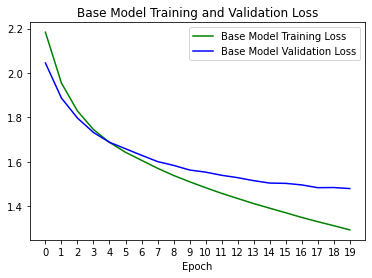

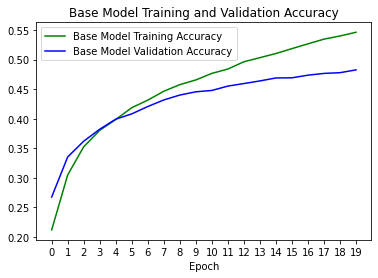

In [ ]:
#Plot the train/validation loss/accuracy against epoch number.
import matplotlib.pyplot as plt

base_train_losses = [list(v)[0] for v in base_model_dict.values()]
base_train_acc = [list(v)[1] for v in base_model_dict.values()]
base_val_losses = [list(v)[2] for v in base_model_dict.values()]
base_val_acc = [list(v)[3] for v in base_model_dict.values()]

fig, axes = plt.subplots(1, 1)
axes.plot(base_train_losses,label='Base Model Training Loss',color='green')
axes.plot(base_val_losses,label='Base Model Validation Loss',color='blue')
plt.legend()
plt.xticks(range(0,20))
plt.xlabel('Epoch')
plt.title('Base Model Training and Validation Loss')
plt.show()


fig, axes = plt.subplots(1, 1)
axes.plot(base_train_acc,label='Base Model Training Accuracy',color='green')
axes.plot(base_val_acc,label='Base Model Validation Accuracy',color='blue')
plt.legend()
plt.xticks(range(0,20))
plt.xlabel('Epoch')
plt.title('Base Model Training and Validation Accuracy')
plt.show()



### Question 3.4 [5 points]
Change the optimizer to [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html). Compare the loss/accuracy curves with that of SGD. Discuss how the Adam optimizer changes the training speed and model performance.

In [ ]:
# Initialize the model, loss function, and optimizer
import torch.optim as optim
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
model#check version of model before starting training 
optimizer #check that optimization function updated

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [ ]:
# Train the model
model = model.to(device)
adam_model_dict={}
best_acc = 0
for epoch in range(20):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_batches):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_batches)
    train_acc = correct/len(train_batches.dataset)
    val_loss, val_acc = model_eval(model, val_batches, criterion)
    adam_model_dict[epoch]=train_loss,train_acc,val_loss,val_acc
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        torch.save(model.state_dict(), 'adam_best_model.pt')

Train Epoch: 0	Loss: 1.908837	Acc: 0.316	Val - Loss:1.825666	Acc:0.354
Train Epoch: 1	Loss: 1.810165	Acc: 0.360	Val - Loss:1.852130	Acc:0.360
Train Epoch: 2	Loss: 1.756471	Acc: 0.378	Val - Loss:1.744956	Acc:0.385
Train Epoch: 3	Loss: 1.718099	Acc: 0.387	Val - Loss:1.753235	Acc:0.379
Train Epoch: 4	Loss: 1.694348	Acc: 0.395	Val - Loss:1.804799	Acc:0.348
Train Epoch: 5	Loss: 1.664254	Acc: 0.407	Val - Loss:1.753145	Acc:0.389
Train Epoch: 6	Loss: 1.647154	Acc: 0.412	Val - Loss:1.779569	Acc:0.382
Train Epoch: 7	Loss: 1.611131	Acc: 0.430	Val - Loss:1.739431	Acc:0.382
Train Epoch: 8	Loss: 1.586840	Acc: 0.432	Val - Loss:1.794445	Acc:0.384
Train Epoch: 9	Loss: 1.577156	Acc: 0.443	Val - Loss:1.770141	Acc:0.407
Train Epoch: 10	Loss: 1.531494	Acc: 0.458	Val - Loss:1.808692	Acc:0.402
Train Epoch: 11	Loss: 1.536896	Acc: 0.458	Val - Loss:1.761449	Acc:0.412
Train Epoch: 12	Loss: 1.516287	Acc: 0.464	Val - Loss:1.804629	Acc:0.410
Train Epoch: 13	Loss: 1.522358	Acc: 0.464	Val - Loss:1.832092	Acc:0.404
Tr

In [ ]:
# Test the model
model.load_state_dict(torch.load('adam_best_model.pt'))
adam_loss, adam_acc = model_eval(model, test_batches, criterion)
print('Test - Loss:{:.6f}\tAcc:{:.3f}'.format(adam_loss, adam_acc))

#Adam model took 4min and 3 sec to complete
#Test - Loss:1.903730	Acc:0.378

Test - Loss:1.903730	Acc:0.378


Adam optimization improves the training speed, but does not improve model performance.


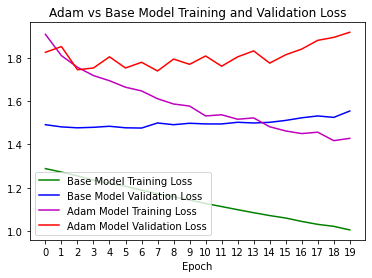

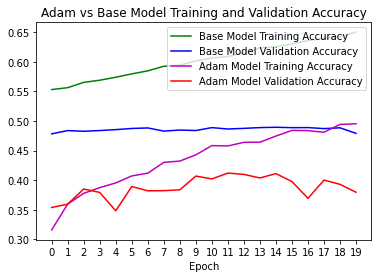

In [ ]:
#Compare the loss/accuracy curves with that of SGD.
#Plot the train/validation loss/accuracy against epoch number.

print('Adam optimization improves the training speed, but does not improve model performance.')


import matplotlib.pyplot as plt

adam_train_losses = [list(v)[0] for v in adam_model_dict.values()]
adam_train_acc = [list(v)[1] for v in adam_model_dict.values()]
adam_val_losses = [list(v)[2] for v in adam_model_dict.values()]
adam_val_acc = [list(v)[3] for v in adam_model_dict.values()]

fig, axes = plt.subplots(1, 1)
axes.plot(base_train_losses,label='Base Model Training Loss',color='green')
axes.plot(base_val_losses,label='Base Model Validation Loss',color='blue')
axes.plot(adam_train_losses,label='Adam Model Training Loss',color='m')
axes.plot(adam_val_losses,label='Adam Model Validation Loss',color='r')
plt.legend()
plt.xticks(range(0,20))
plt.xlabel('Epoch')
plt.title('Adam vs Base Model Training and Validation Loss')
plt.show()


fig, axes = plt.subplots(1, 1)
axes.plot(base_train_acc,label='Base Model Training Accuracy',color='green')
axes.plot(base_val_acc,label='Base Model Validation Accuracy',color='blue')
axes.plot(adam_train_acc,label='Adam Model Training Accuracy',color='m')
axes.plot(adam_val_acc,label='Adam Model Validation Accuracy',color='r')
plt.legend()
plt.xticks(range(0,20))
plt.xlabel('Epoch')
plt.title('Adam vs Base Model Training and Validation Accuracy')
plt.show()


### Question 3.5 [5 points]
Add [Batch Normalization](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html) to each hidden layer. BN should be added before the activation. Discuss how BN changes the training speed and model performance.

In [ ]:
# Define the MLP model

class BN_MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Linear(64, 64),
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.layers(x)




In [ ]:
# Initialize the model, loss function, and optimizer
import torch.optim as optim
model = BN_MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
model #check version of model before starting training 

BN_MLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=64, bias=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# Train the model
model = model.to(device)
BN_model_dict={}
best_acc = 0
for epoch in range(20):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_batches):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_batches)
    train_acc = correct/len(train_batches.dataset)
    val_loss, val_acc = model_eval(model, val_batches, criterion)
    BN_model_dict[epoch]=train_loss,train_acc,val_loss,val_acc
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        torch.save(model.state_dict(), 'BN_best_model.pt')

Train Epoch: 0	Loss: 1.678374	Acc: 0.416	Val - Loss:1.642441	Acc:0.427
Train Epoch: 1	Loss: 1.581239	Acc: 0.450	Val - Loss:1.580586	Acc:0.442
Train Epoch: 2	Loss: 1.508780	Acc: 0.473	Val - Loss:1.539801	Acc:0.458
Train Epoch: 3	Loss: 1.451354	Acc: 0.493	Val - Loss:1.508700	Acc:0.467
Train Epoch: 4	Loss: 1.403875	Acc: 0.510	Val - Loss:1.486207	Acc:0.471
Train Epoch: 5	Loss: 1.365632	Acc: 0.516	Val - Loss:1.487768	Acc:0.472
Train Epoch: 6	Loss: 1.332468	Acc: 0.529	Val - Loss:1.467027	Acc:0.480
Train Epoch: 7	Loss: 1.299965	Acc: 0.541	Val - Loss:1.471078	Acc:0.477
Train Epoch: 8	Loss: 1.270127	Acc: 0.552	Val - Loss:1.464592	Acc:0.483
Train Epoch: 9	Loss: 1.242119	Acc: 0.562	Val - Loss:1.458006	Acc:0.486
Train Epoch: 10	Loss: 1.212959	Acc: 0.571	Val - Loss:1.471254	Acc:0.479
Train Epoch: 11	Loss: 1.190729	Acc: 0.580	Val - Loss:1.457801	Acc:0.489
Train Epoch: 12	Loss: 1.170339	Acc: 0.588	Val - Loss:1.471252	Acc:0.484
Train Epoch: 13	Loss: 1.155513	Acc: 0.594	Val - Loss:1.470036	Acc:0.486
Tr

In [ ]:
# Test the model
model.load_state_dict(torch.load('BN_best_model.pt'))
BN_loss, BN_acc = model_eval(model, test_batches, criterion)
print('Test - Loss:{:.6f}\tAcc:{:.3f}'.format(BN_loss, BN_acc))

#the BN model took 4 minutes and 10 seconds to train
#Test - Loss:1.499915	Acc:0.483

Test - Loss:1.499915	Acc:0.483


Batch Normalization worsens the training speed and does not increase model performance


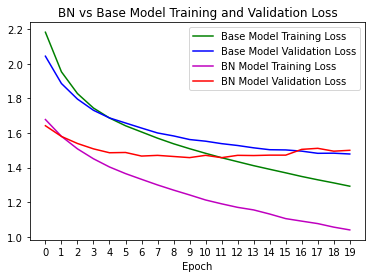

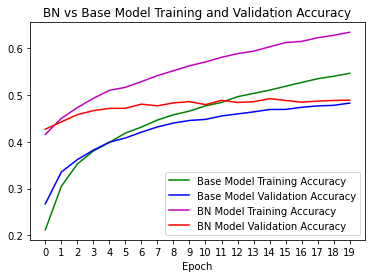

In [ ]:
import matplotlib.pyplot as plt

print('Batch Normalization worsens the training speed and does not increase model performance')

BN_train_losses = [list(v)[0] for v in BN_model_dict.values()]
BN_train_acc = [list(v)[1] for v in BN_model_dict.values()]
BN_val_losses = [list(v)[2] for v in BN_model_dict.values()]
BN_val_acc = [list(v)[3] for v in BN_model_dict.values()]

fig, axes = plt.subplots(1, 1)
axes.plot(base_train_losses,label='Base Model Training Loss',color='green')
axes.plot(base_val_losses,label='Base Model Validation Loss',color='blue')
axes.plot(BN_train_losses,label='BN Model Training Loss',color='m')
axes.plot(BN_val_losses,label='BN Model Validation Loss',color='r')
plt.legend()
plt.xticks(range(0,20))
plt.xlabel('Epoch')
plt.title('BN vs Base Model Training and Validation Loss')
plt.show()


fig, axes = plt.subplots(1, 1)
axes.plot(base_train_acc,label='Base Model Training Accuracy',color='green')
axes.plot(base_val_acc,label='Base Model Validation Accuracy',color='blue')
axes.plot(BN_train_acc,label='BN Model Training Accuracy',color='m')
axes.plot(BN_val_acc,label='BN Model Validation Accuracy',color='r')
plt.legend()
plt.xticks(range(0,20))
plt.xlabel('Epoch')
plt.title('BN vs Base Model Training and Validation Accuracy')
plt.show()


### Question 3.6 [5 points]
Replace the BN layers with [Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) layers. Use the default dropout rate of 0.5. Discuss how Dropout changes the training speed and model performance.

In [ ]:
# Define the MLP model

class drop_MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.Dropout(0.5),
      nn.ReLU(),
      nn.Linear(64, 64),
      nn.Dropout(0.5),
      nn.ReLU(),
      nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.layers(x)




In [ ]:
# Initialize the model, loss function, and optimizer
import torch.optim as optim
model = drop_MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
model

drop_MLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=64, bias=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): ReLU()
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# Train the model
model = model.to(device)
drop_model_dict={}
best_acc = 0
for epoch in range(20):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_batches):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_batches)
    train_acc = correct/len(train_batches.dataset)
    val_loss, val_acc = model_eval(model, val_batches, criterion)
    drop_model_dict[epoch]=train_loss,train_acc,val_loss,val_acc
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        torch.save(model.state_dict(), 'drop_best_model.pt')

Train Epoch: 0	Loss: 2.242458	Acc: 0.155	Val - Loss:2.112696	Acc:0.284
Train Epoch: 1	Loss: 2.083256	Acc: 0.242	Val - Loss:1.956251	Acc:0.329
Train Epoch: 2	Loss: 1.992855	Acc: 0.276	Val - Loss:1.877551	Acc:0.351
Train Epoch: 3	Loss: 1.948334	Acc: 0.293	Val - Loss:1.835089	Acc:0.359
Train Epoch: 4	Loss: 1.912794	Acc: 0.308	Val - Loss:1.806741	Acc:0.366
Train Epoch: 5	Loss: 1.889070	Acc: 0.319	Val - Loss:1.781375	Acc:0.378
Train Epoch: 6	Loss: 1.862644	Acc: 0.324	Val - Loss:1.762359	Acc:0.381
Train Epoch: 7	Loss: 1.851099	Acc: 0.333	Val - Loss:1.746973	Acc:0.384
Train Epoch: 8	Loss: 1.837804	Acc: 0.341	Val - Loss:1.741585	Acc:0.391
Train Epoch: 9	Loss: 1.831276	Acc: 0.341	Val - Loss:1.721606	Acc:0.394
Train Epoch: 10	Loss: 1.815096	Acc: 0.349	Val - Loss:1.712941	Acc:0.395
Train Epoch: 11	Loss: 1.805058	Acc: 0.352	Val - Loss:1.704086	Acc:0.399
Train Epoch: 12	Loss: 1.798759	Acc: 0.357	Val - Loss:1.694812	Acc:0.405
Train Epoch: 13	Loss: 1.786154	Acc: 0.360	Val - Loss:1.687288	Acc:0.405
Tr

In [ ]:
# Test the model
model.load_state_dict(torch.load('drop_best_model.pt'))
drop_loss, drop_acc = model_eval(model, test_batches, criterion)
print('Test - Loss:{:.6f}\tAcc:{:.3f}'.format(drop_loss, drop_acc))

#The dropout model took 3 mintues and 58 seconds to run
#Test - Loss:1.631267	Acc:0.427

Test - Loss:1.631267	Acc:0.427


Dropout increases the training speed and decreases model performance


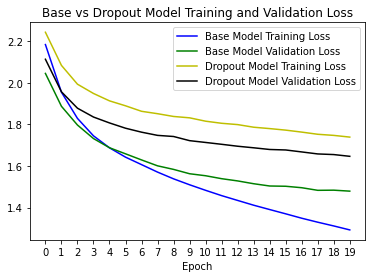

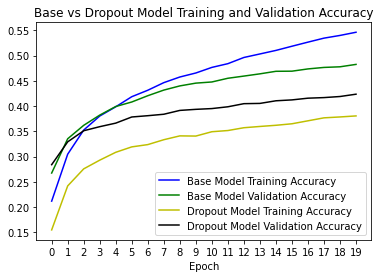

In [ ]:
#Compare the loss/accuracy curves with that of SGD.
#Plot the train/validation loss/accuracy against epoch number.
import matplotlib.pyplot as plt

print('Dropout increases the training speed and decreases model performance')

drop_train_losses = [list(v)[0] for v in drop_model_dict.values()]
drop_train_acc = [list(v)[1] for v in drop_model_dict.values()]
drop_val_losses = [list(v)[2] for v in drop_model_dict.values()]
drop_val_acc = [list(v)[3] for v in drop_model_dict.values()]

fig, axes = plt.subplots(1, 1)
axes.plot(base_train_losses,label='Base Model Training Loss',color='b')
axes.plot(base_val_losses,label='Base Model Validation Loss',color='g')
axes.plot(drop_train_losses,label='Dropout Model Training Loss',color='y')
axes.plot(drop_val_losses,label='Dropout Model Validation Loss',color='k')
plt.legend()
plt.xticks(range(0,20))
plt.xlabel('Epoch')
plt.title('Base vs Dropout Model Training and Validation Loss')
plt.show()


fig, axes = plt.subplots(1, 1)
axes.plot(base_train_acc,label='Base Model Training Accuracy',color='b')
axes.plot(base_val_acc,label='Base Model Validation Accuracy',color='g')
axes.plot(drop_train_acc,label='Dropout Model Training Accuracy',color='y')
axes.plot(drop_val_acc,label='Dropout Model Validation Accuracy',color='k')
plt.legend()
plt.xticks(range(0,20))
plt.xlabel('Epoch')
plt.title('Base vs Dropout Model Training and Validation Accuracy')
plt.show()

### Question 3.7 [12 points]
Now, focus on increasing the model's test accuracy as much as possible. You can achieve this by modifying the network structure, adjusting hyperparameters, or applying other techniques covered in the lecture. When making changes, discuss the reasoning behind your decisions and the impact on the model's performance.

###### COMBINE BATCH NORMALIZATION MLP AND ADAM OPTIMIZATION ########

Batch normalization improves the generalizability of neural network models by reducing internal covariate shifts. Adam optimization improves the training speed of the model. Together I hypothesize that they will improve model performance measured by test accuracy and training time. 

In [ ]:
#BATCH NORMALIZATION WITH ADAM OPTIMIZER 

class BN_MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Linear(64, 64),
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.layers(x)


In [ ]:
# Initialize the model, loss function, and optimizer
import torch.optim as optim
model = BN_MLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [ ]:
# Train the model
model = model.to(device)
BN_Adam_model_dict={}
best_acc = 0
for epoch in range(20):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_batches):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_batches)
    train_acc = correct/len(train_batches.dataset)
    val_loss, val_acc = model_eval(model, val_batches, criterion)
    BN_Adam_model_dict[epoch]=train_loss,train_acc,val_loss,val_acc
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        torch.save(model.state_dict(), 'BN_Adam_best_model.pt')

Train Epoch: 0	Loss: 1.749266	Acc: 0.373	Val - Loss:1.631704	Acc:0.416
Train Epoch: 1	Loss: 1.566112	Acc: 0.439	Val - Loss:1.535795	Acc:0.449
Train Epoch: 2	Loss: 1.479770	Acc: 0.467	Val - Loss:1.489184	Acc:0.469
Train Epoch: 3	Loss: 1.416366	Acc: 0.491	Val - Loss:1.475511	Acc:0.475
Train Epoch: 4	Loss: 1.369121	Acc: 0.511	Val - Loss:1.447741	Acc:0.484
Train Epoch: 5	Loss: 1.327401	Acc: 0.523	Val - Loss:1.460893	Acc:0.483
Train Epoch: 6	Loss: 1.288161	Acc: 0.538	Val - Loss:1.478955	Acc:0.479
Train Epoch: 7	Loss: 1.250693	Acc: 0.552	Val - Loss:1.442642	Acc:0.492
Train Epoch: 8	Loss: 1.223937	Acc: 0.557	Val - Loss:1.457039	Acc:0.494
Train Epoch: 9	Loss: 1.193644	Acc: 0.568	Val - Loss:1.458294	Acc:0.487
Train Epoch: 10	Loss: 1.160731	Acc: 0.582	Val - Loss:1.465254	Acc:0.493
Train Epoch: 11	Loss: 1.136566	Acc: 0.588	Val - Loss:1.480789	Acc:0.497
Train Epoch: 12	Loss: 1.121700	Acc: 0.593	Val - Loss:1.483121	Acc:0.491
Train Epoch: 13	Loss: 1.087016	Acc: 0.609	Val - Loss:1.493306	Acc:0.496
Tr

In [ ]:
# Test the model
model.load_state_dict(torch.load('BN_Adam_best_model.pt'))
BN_Adam_loss, BN_Adam_acc = model_eval(model, test_batches, criterion)
print('Test - Loss:{:.6f}\tAcc:{:.3f}'.format(BN_Adam_loss, BN_Adam_acc))

#the BN_Adam model took 4 minutes and 5 seconds to train
#Test - Loss:1.608877	Acc:0.488

print('MLP with Batch Normalization using an adam optimizer is the most accurate, but slowest model')

Test - Loss:1.608877	Acc:0.488
MLP with Batch Normalization using an adam optimizer is the most accurate, but slowest model


###### ADD WEIGHT DECAY TO Batch Normalization + ADAM OPTIMIZER Model ########

Weight decay adds a penalty parameter to the loss function to reduce model overfitting to training data. Adding a weight decay hyperparameter to the batch normalization + adam optimization model could potentially increase test accuracy by further reducing overfitting and increasing generalizability.

In [ ]:
import torch.optim as optim
model = BN_MLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01,weight_decay=0.01)

In [ ]:
# Train the model
model = model.to(device)
BN_Adam_WD_model_dict={}
best_acc = 0
for epoch in range(20):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_batches):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_batches)
    train_acc = correct/len(train_batches.dataset)
    val_loss, val_acc = model_eval(model, val_batches, criterion)
    BN_Adam_WD_model_dict[epoch]=train_loss,train_acc,val_loss,val_acc
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        torch.save(model.state_dict(), 'BN_Adam_WD_best_model.pt')

Train Epoch: 0	Loss: 1.940720	Acc: 0.297	Val - Loss:1.940880	Acc:0.297
Train Epoch: 1	Loss: 1.935104	Acc: 0.295	Val - Loss:1.973227	Acc:0.290
Train Epoch: 2	Loss: 1.925714	Acc: 0.304	Val - Loss:1.926569	Acc:0.307
Train Epoch: 3	Loss: 1.926281	Acc: 0.299	Val - Loss:1.986136	Acc:0.283
Train Epoch: 4	Loss: 1.926243	Acc: 0.297	Val - Loss:1.942889	Acc:0.286
Train Epoch: 5	Loss: 1.922365	Acc: 0.301	Val - Loss:1.934303	Acc:0.283
Train Epoch: 6	Loss: 1.927859	Acc: 0.301	Val - Loss:1.955375	Acc:0.266
Train Epoch: 7	Loss: 1.926213	Acc: 0.301	Val - Loss:1.924764	Acc:0.299
Train Epoch: 8	Loss: 1.924599	Acc: 0.300	Val - Loss:2.053695	Acc:0.246
Train Epoch: 9	Loss: 1.918384	Acc: 0.302	Val - Loss:1.947455	Acc:0.285
Train Epoch: 10	Loss: 1.926295	Acc: 0.302	Val - Loss:1.918874	Acc:0.296
Train Epoch: 11	Loss: 1.922517	Acc: 0.303	Val - Loss:1.956145	Acc:0.291
Train Epoch: 12	Loss: 1.918855	Acc: 0.303	Val - Loss:1.926725	Acc:0.289
Train Epoch: 13	Loss: 1.935836	Acc: 0.292	Val - Loss:1.967017	Acc:0.277
Tr

In [ ]:
# Test the model
model.load_state_dict(torch.load('BN_Adam_WD_best_model.pt'))
BN_Adam_WD_loss, BN_Adam_WD_acc = model_eval(model, test_batches, criterion)
print('Test - Loss:{:.6f}\tAcc:{:.3f}'.format(BN_Adam_WD_loss, BN_Adam_WD_acc))

#the BN_Adam_WD model took 4 minutes and 3 seconds to train just 7 epochs
#Test - Loss:1.963919	Acc:0.272

print('Adding weight decay to this model significantly reduces accuracy.')

Test - Loss:1.963919	Acc:0.272
Adding weight decay to this model significantly reduces accuracy and slows training considerably.


###### CHANGE ACTIVATION FUNCTION 

Since weight decay did not improve the model, I will try leaky Relu which is designed to reduce model overfitting and increase training speed by fixing the 'dying relu' problem by eliminating 0 slope for negative values and instead using 0.01 to make sure learning is still happening. I hypothesize this will increase training speed. 

In [ ]:
#BATCH NORMALIZATION WITH ADAM OPTIMIZER AND LEAKY RELU

class Leaky_BN_MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.BatchNorm1d(64),
      nn.LeakyReLU(),
      nn.Linear(64, 64),
      nn.BatchNorm1d(64),
      nn.LeakyReLU(),
      nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.layers(x)


In [ ]:
##### Leaky Relu with Batch norm + Adam model
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
model = Leaky_BN_MLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
        

In [ ]:
model

Leaky_BN_MLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=64, bias=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# Train the model
model = model.to(device)
Leaky_BN_Adam_model_dict={}
best_acc = 0
for epoch in range(20):
    model.train()
    train_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_batches):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_batches)
    train_acc = correct/len(train_batches.dataset)
    val_loss, val_acc = model_eval(model, val_batches, criterion)
    Leaky_BN_Adam_model_dict[epoch]=train_loss,train_acc,val_loss,val_acc
    print('Train Epoch: {}\tLoss: {:.6f}\tAcc: {:.3f}'
          '\tVal - Loss:{:.6f}\tAcc:{:.3f}'.format(
              epoch, train_loss, train_acc, val_loss, val_acc))
    if val_acc > best_acc:
        torch.save(model.state_dict(), 'Leaky_BN_Adam_best_model.pt')

Train Epoch: 0	Loss: 1.754001	Acc: 0.367	Val - Loss:1.640562	Acc:0.407
Train Epoch: 1	Loss: 1.569494	Acc: 0.438	Val - Loss:1.522158	Acc:0.456
Train Epoch: 2	Loss: 1.478478	Acc: 0.469	Val - Loss:1.505915	Acc:0.453
Train Epoch: 3	Loss: 1.421590	Acc: 0.493	Val - Loss:1.492492	Acc:0.470
Train Epoch: 4	Loss: 1.373023	Acc: 0.511	Val - Loss:1.461929	Acc:0.480
Train Epoch: 5	Loss: 1.334675	Acc: 0.520	Val - Loss:1.460609	Acc:0.485
Train Epoch: 6	Loss: 1.295232	Acc: 0.537	Val - Loss:1.439604	Acc:0.487
Train Epoch: 7	Loss: 1.265278	Acc: 0.546	Val - Loss:1.443786	Acc:0.492
Train Epoch: 8	Loss: 1.230870	Acc: 0.560	Val - Loss:1.466897	Acc:0.493
Train Epoch: 9	Loss: 1.201907	Acc: 0.569	Val - Loss:1.447398	Acc:0.497
Train Epoch: 10	Loss: 1.174155	Acc: 0.580	Val - Loss:1.471787	Acc:0.493
Train Epoch: 11	Loss: 1.156820	Acc: 0.586	Val - Loss:1.472962	Acc:0.496
Train Epoch: 12	Loss: 1.122526	Acc: 0.596	Val - Loss:1.476831	Acc:0.496
Train Epoch: 13	Loss: 1.104948	Acc: 0.601	Val - Loss:1.477433	Acc:0.495
Tr

In [ ]:
# Test the model
model.load_state_dict(torch.load('Leaky_BN_Adam_best_model.pt'))
Leaky_BN_Adam_loss, Leaky_BN_Adam_acc = model_eval(model, test_batches, criterion)
print('Test - Loss:{:.6f}\tAcc:{:.3f}'.format(Leaky_BN_Adam_loss, Leaky_BN_Adam_acc))

#the Leaky_BN_Adam model took 4 minutes and 7 seconds to train
#Test - Loss:1.560012	Acc:0.486

print('MLP with Batch Normalization using an adam optimizer and leaky Relu activation is not the most accurate.')

Test - Loss:1.560012	Acc:0.486
MLP with Batch Normalization using an adam optimizer and leaky Relu activation is not the most accurate.


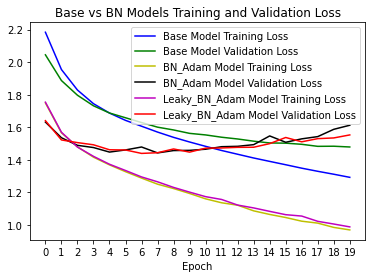

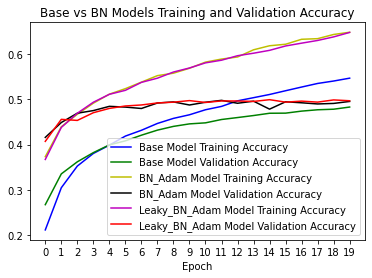

In [ ]:
#COMPARE LOSS/ACCURACY CURVES WITH DIFFERENT BN MODELS
#Plot the train/validation loss/accuracy against epoch number.
import matplotlib.pyplot as plt


BN_Adam_train_losses = [list(v)[0] for v in BN_Adam_model_dict.values()]
BN_Adam_train_acc = [list(v)[1] for v in BN_Adam_model_dict.values()]
BN_Adam_val_losses = [list(v)[2] for v in BN_Adam_model_dict.values()]
BN_Adam_val_acc = [list(v)[3] for v in BN_Adam_model_dict.values()]


Leaky_BN_Adam_train_losses = [list(v)[0] for v in Leaky_BN_Adam_model_dict.values()]
Leaky_BN_Adam_train_acc = [list(v)[1] for v in Leaky_BN_Adam_model_dict.values()]
Leaky_BN_Adam_val_losses = [list(v)[2] for v in Leaky_BN_Adam_model_dict.values()]
Leaky_BN_Adam_val_acc = [list(v)[3] for v in Leaky_BN_Adam_model_dict.values()]

fig, axes = plt.subplots(1, 1)
axes.plot(base_train_losses,label='Base Model Training Loss',color='b')
axes.plot(base_val_losses,label='Base Model Validation Loss',color='g')
axes.plot(BN_Adam_train_losses,label='BN_Adam Model Training Loss',color='y')
axes.plot(BN_Adam_val_losses,label='BN_Adam Model Validation Loss',color='k')
axes.plot(Leaky_BN_Adam_train_losses,label='Leaky_BN_Adam Model Training Loss',color='m')
axes.plot(Leaky_BN_Adam_val_losses,label='Leaky_BN_Adam Model Validation Loss',color='r')
plt.legend()
plt.xticks(range(0,20))
plt.xlabel('Epoch')
plt.title('Base vs BN Models Training and Validation Loss')
plt.show()


fig, axes = plt.subplots(1, 1)
axes.plot(base_train_acc,label='Base Model Training Accuracy',color='b')
axes.plot(base_val_acc,label='Base Model Validation Accuracy',color='g')
axes.plot(BN_Adam_train_acc,label='BN_Adam Model Training Accuracy',color='y')
axes.plot(BN_Adam_val_acc,label='BN_Adam Model Validation Accuracy',color='k')
axes.plot(Leaky_BN_Adam_train_acc,label='Leaky_BN_Adam Model Training Accuracy',color='m')
axes.plot(Leaky_BN_Adam_val_acc,label='Leaky_BN_Adam Model Validation Accuracy',color='r')
plt.legend()
plt.xticks(range(0,20))
plt.xlabel('Epoch')
plt.title('Base vs BN Models Training and Validation Accuracy')
plt.show()

THE MODEL WITH THE HIGHEST TRAINING ACCURACY IS THE BATCH NORMALIZATION + ADAM OPTIMIZATION + LEAKY RELU ACTIVATION MODEL.

THE MODEL WITH THE HIGHEST TEST ACCURACY IS THE BATCH NORMALIZATION AND ADAM OPTIMIZATION MODEL